### Description::

This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.



### Key Features:



Data As we can see in the first rows below the dataset has 9 feature columns and a target column. The feature columms are :

    Step: This feature represents the day from the start of simulation. It has 180 steps so simulation ran for virtually 6 months.
    Customer: This feature represents the customer id
    zipCodeOrigin: The zip code of origin/source.
    Merchant: The merchant's id
    zipMerchant: The merchant's zip code
    Age: Categorized age
        0: <= 18,
        1: 19-25,
        2: 26-35,
        3: 36-45,
        4: 46:55,
        5: 56:65,
        6: > 65
        U: Unknown
    Gender: Gender for customer
        E : Enterprise,
        F: Female,
        M: Male,
        U: Unknown
    Category: Category of the purchase. I won't write all categories here, we'll see them later in the analysis.
    Amount: Amount of the purchase
    Fraud: Target variable which shows if the transaction fraudulent(1) or benign(0)



##### En primer lugar importamos las librerías que usaremos

In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, mean_squared_error, r2_score


import xgboost as xgb

#### Análisis Exploratorio de Datos (EDA)

###### Exportamos el dataset

In [40]:
df = pd.read_csv("bs140513_032310.csv")

###### Visualizamos el dataset

In [41]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   step      594643 non-null  int64  
 1   customer  594643 non-null  object 
 2   age       594643 non-null  object 
 3   gender    594643 non-null  object 
 4   merchant  594643 non-null  object 
 5   category  594643 non-null  object 
 6   amount    594643 non-null  float64
 7   fraud     594643 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 36.3+ MB


In [42]:
df.customer.value_counts()

customer
'C1978250683'    265
'C1275518867'    252
'C806399525'     237
'C515668508'     205
'C1338396147'    195
                ... 
'C1345586046'      6
'C1156745710'      6
'C1404665203'      5
'C1743702978'      5
'C1809646275'      5
Name: count, Length: 4112, dtype: int64

In [43]:
df.age.value_counts()

age
'2'    187310
'3'    147131
'4'    109025
'5'     62642
'1'     58131
'6'     26774
'0'      2452
'U'      1178
Name: count, dtype: int64

In [44]:
df.gender.value_counts()

gender
'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: count, dtype: int64

In [45]:
df.zipcodeOri.value_counts()

zipcodeOri
'28007'    594643
Name: count, dtype: int64

In [46]:
df.merchant.value_counts()

merchant
'M1823072687'    299693
'M348934600'     205426
'M85975013'       26254
'M1053599405'      6821
'M151143676'       6373
'M855959430'       6098
'M1946091778'      5343
'M1913465890'      3988
'M209847108'       3814
'M480139044'       3508
'M349281107'       2881
'M1600850729'      2624
'M1535107174'      1868
'M980657600'       1769
'M78078399'        1608
'M1198415165'      1580
'M840466850'       1399
'M1649169323'      1173
'M547558035'        949
'M50039827'         916
'M1888755466'       912
'M692898500'        900
'M1400236507'       776
'M1842530320'       751
'M732195782'        608
'M97925176'         599
'M45060432'         573
'M1741626453'       528
'M1313686961'       527
'M1872033263'       525
'M1352454843'       370
'M677738360'        358
'M2122776122'       341
'M923029380'        323
'M3697346'          308
'M17379832'         282
'M1748431652'       274
'M1873032707'       250
'M2011752106'       244
'M1416436880'       220
'M1294758098'       191
'M17885

In [47]:
df.zipMerchant.value_counts()

zipMerchant
'28007'    594643
Name: count, dtype: int64

In [48]:
df.category.value_counts()

category
'es_transportation'        505119
'es_food'                   26254
'es_health'                 16133
'es_wellnessandbeauty'      15086
'es_fashion'                 6454
'es_barsandrestaurants'      6373
'es_hyper'                   6098
'es_sportsandtoys'           4002
'es_tech'                    2370
'es_home'                    1986
'es_hotelservices'           1744
'es_otherservices'            912
'es_contents'                 885
'es_travel'                   728
'es_leisure'                  499
Name: count, dtype: int64

In [49]:
df.amount.value_counts()

amount
26.67     146
14.93     146
17.57     145
17.26     143
16.12     143
         ... 
222.85      1
99.86       1
164.50      1
112.54      1
190.31      1
Name: count, Length: 23767, dtype: int64

In [50]:
df.fraud.value_counts()

fraud
0    587443
1      7200
Name: count, dtype: int64

##### Dropeamos las columnas zipcodeOri y zipMerchant, ya que ambas columnas representan un único valor a lo largo de todo el DataFrame

In [51]:
df=df.drop(columns=['zipcodeOri','zipMerchant'])

In [52]:
x = df
# Análisis de calidad de la base de datos
print("TOTAL NUMBER OF ROWS: ",len(x),"\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -\n")
print("NUMBER OF UNIQUE VALUES:",x.nunique(),"\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")
print("NUMBER OF UNIQUE VALUES DIVIDED BY TOTAL VALUES:",round((x.nunique()/len(x)*100),2),"%\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")
print("% OF NAN VALUES IS: ",round(100*(x.isnull().sum() / len(x)),2),"%\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")

TOTAL NUMBER OF ROWS:  594643 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

NUMBER OF UNIQUE VALUES: step          180
customer     4112
age             8
gender          4
merchant       50
category       15
amount      23767
fraud           2
dtype: int64 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

NUMBER OF UNIQUE VALUES DIVIDED BY TOTAL VALUES: step        0.03
customer    0.69
age         0.00
gender      0.00
merchant    0.01
category    0.00
amount      4.00
fraud       0.00
dtype: float64 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

% OF NAN VALUES IS:  step        0.0
customer    0.0
age         0.0
gender      0.0
merchant    0.0
category    0.0
amount      0.0
fraud       0.0
dtype: float64 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 



##### La fila step representa un único día de 180 días, por lo que pasaremos step a fecha creando una fecha de inicio en una nueva columna llamada fecha

In [55]:
fecha_inicio = pd.to_datetime("2024-01-01")
df["fecha"] = fecha_inicio + pd.to_timedelta(df["step"] , unit='D')
df.head()

,step,customer,age,gender,merchant,category,amount,fraud,fecha
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0,2024-01-01
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0,2024-01-01
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0,2024-01-01
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0,2024-01-01
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0,2024-01-01


##### Una vez tenemos creada la fecha, extraemos el mes de la fecha y nos quedamos únicamente con el mes de la transacción en una fila llamada month

In [57]:
df['fecha'] = pd.to_datetime(df['fecha'])

df['month'] = df['fecha'].dt.month
df.head()

,step,customer,age,gender,merchant,category,amount,fraud,fecha,month
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0,2024-01-01,1
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0,2024-01-01,1
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0,2024-01-01,1
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0,2024-01-01,1
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0,2024-01-01,1


In [81]:
df = df.drop(columns=["fecha", "step"])
df.head()

,age,gender,merchant,category,amount,fraud,month
0,4,M,other,transportation,4.55,0,January
1,2,M,other,transportation,39.68,0,January
2,4,F,other,transportation,26.89,0,January
3,3,M,other,transportation,17.25,0,January
4,5,M,other,transportation,35.72,0,January


##### Una vez hemos hecho el drop, ahora pasaremos la columna age a entero y nos desharemos de las comillas para poder manipular los datos de manera más sencilla

In [58]:
df["age"] = df["age"].str.strip("'")
df["age"] = df["age"].replace('U', 7) 
df["age"] = df["age"].astype(int)

In [59]:
df["gender"] = df["gender"].str.strip("'")
df["customer"] = df["customer"].str.strip("'")
df["merchant"] = df["merchant"].str.strip("'")
df["category"] = df["category"].str.strip("'")

##### Al tener tantos merchants, distinguimos los 6 merchants que más fraude han cometido y al resto los agrupamos bajo el nombre de "other"

In [60]:
merchant_fraud=df[(df.fraud==1)].merchant.value_counts()[:6]

In [61]:
df.merchant=df.merchant.apply(lambda x : x if x in merchant_fraud else 'other')

In [62]:
df.merchant.value_counts()

merchant
other          580772
M855959430       6098
M480139044       3508
M980657600       1769
M1198415165      1580
M732195782        608
M3697346          308
Name: count, dtype: int64

##### Nos deshacemos de la columna "customer" ya que preferimos centrarnos en el merchant más que en la víctima, y además tenemos ya la información necesaria para poder hacer una evaluación como edad o género, siendo esto mucho más relevante que el nombre o el ID

In [64]:
df=df.drop(columns='customer')
df.head()

,step,age,gender,merchant,category,amount,fraud,fecha,month
0,0,4,M,other,es_transportation,4.55,0,2024-01-01,1
1,0,2,M,other,es_transportation,39.68,0,2024-01-01,1
2,0,4,F,other,es_transportation,26.89,0,2024-01-01,1
3,0,3,M,other,es_transportation,17.25,0,2024-01-01,1
4,0,5,M,other,es_transportation,35.72,0,2024-01-01,1


##### Ahora cambiamos el nombre de las categorías y los meses para que sea más entedible

In [65]:
category_mapping = {
    'es_barsandrestaurants': 'bars and restaurants',
    'es_contents': 'contents',
    'es_fashion': 'fashion',
    'es_food': 'food',
    'es_health': 'health',
    'es_home': 'home',
    'es_hotelservices': 'hotel and services',
    'es_hyper': 'hyper',
    'es_leisure': 'leisure',
    'es_otherservices': 'other services',
    'es_sportsandtoys': 'sports and toys',
    'es_tech': 'tech',
    'es_transportation': 'transportation',
    'es_travel': 'travel',
    'es_wellnessandbeauty': 'wellness and beauty'
}

month_mapping = {
    1: 'January', 2: 'February', 3: 'March',
    4: 'April', 5: 'May', 6: 'June'
}
month_order = list(month_mapping.values())

df['category'] = df['category'].replace(category_mapping)
df['month'] = df['month'].replace(month_mapping)

df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

##### Una vez tenemos los datos limpios, comenzamos a graficarlos y ver el fraude en porcentajes (%)

###### Empezamos viendo el fraude en género

C:\Users\esteb\AppData\Local\Temp\ipykernel_262020\3009550693.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = df.groupby(['month', "gender"])['fraud'].mean().reset_index()


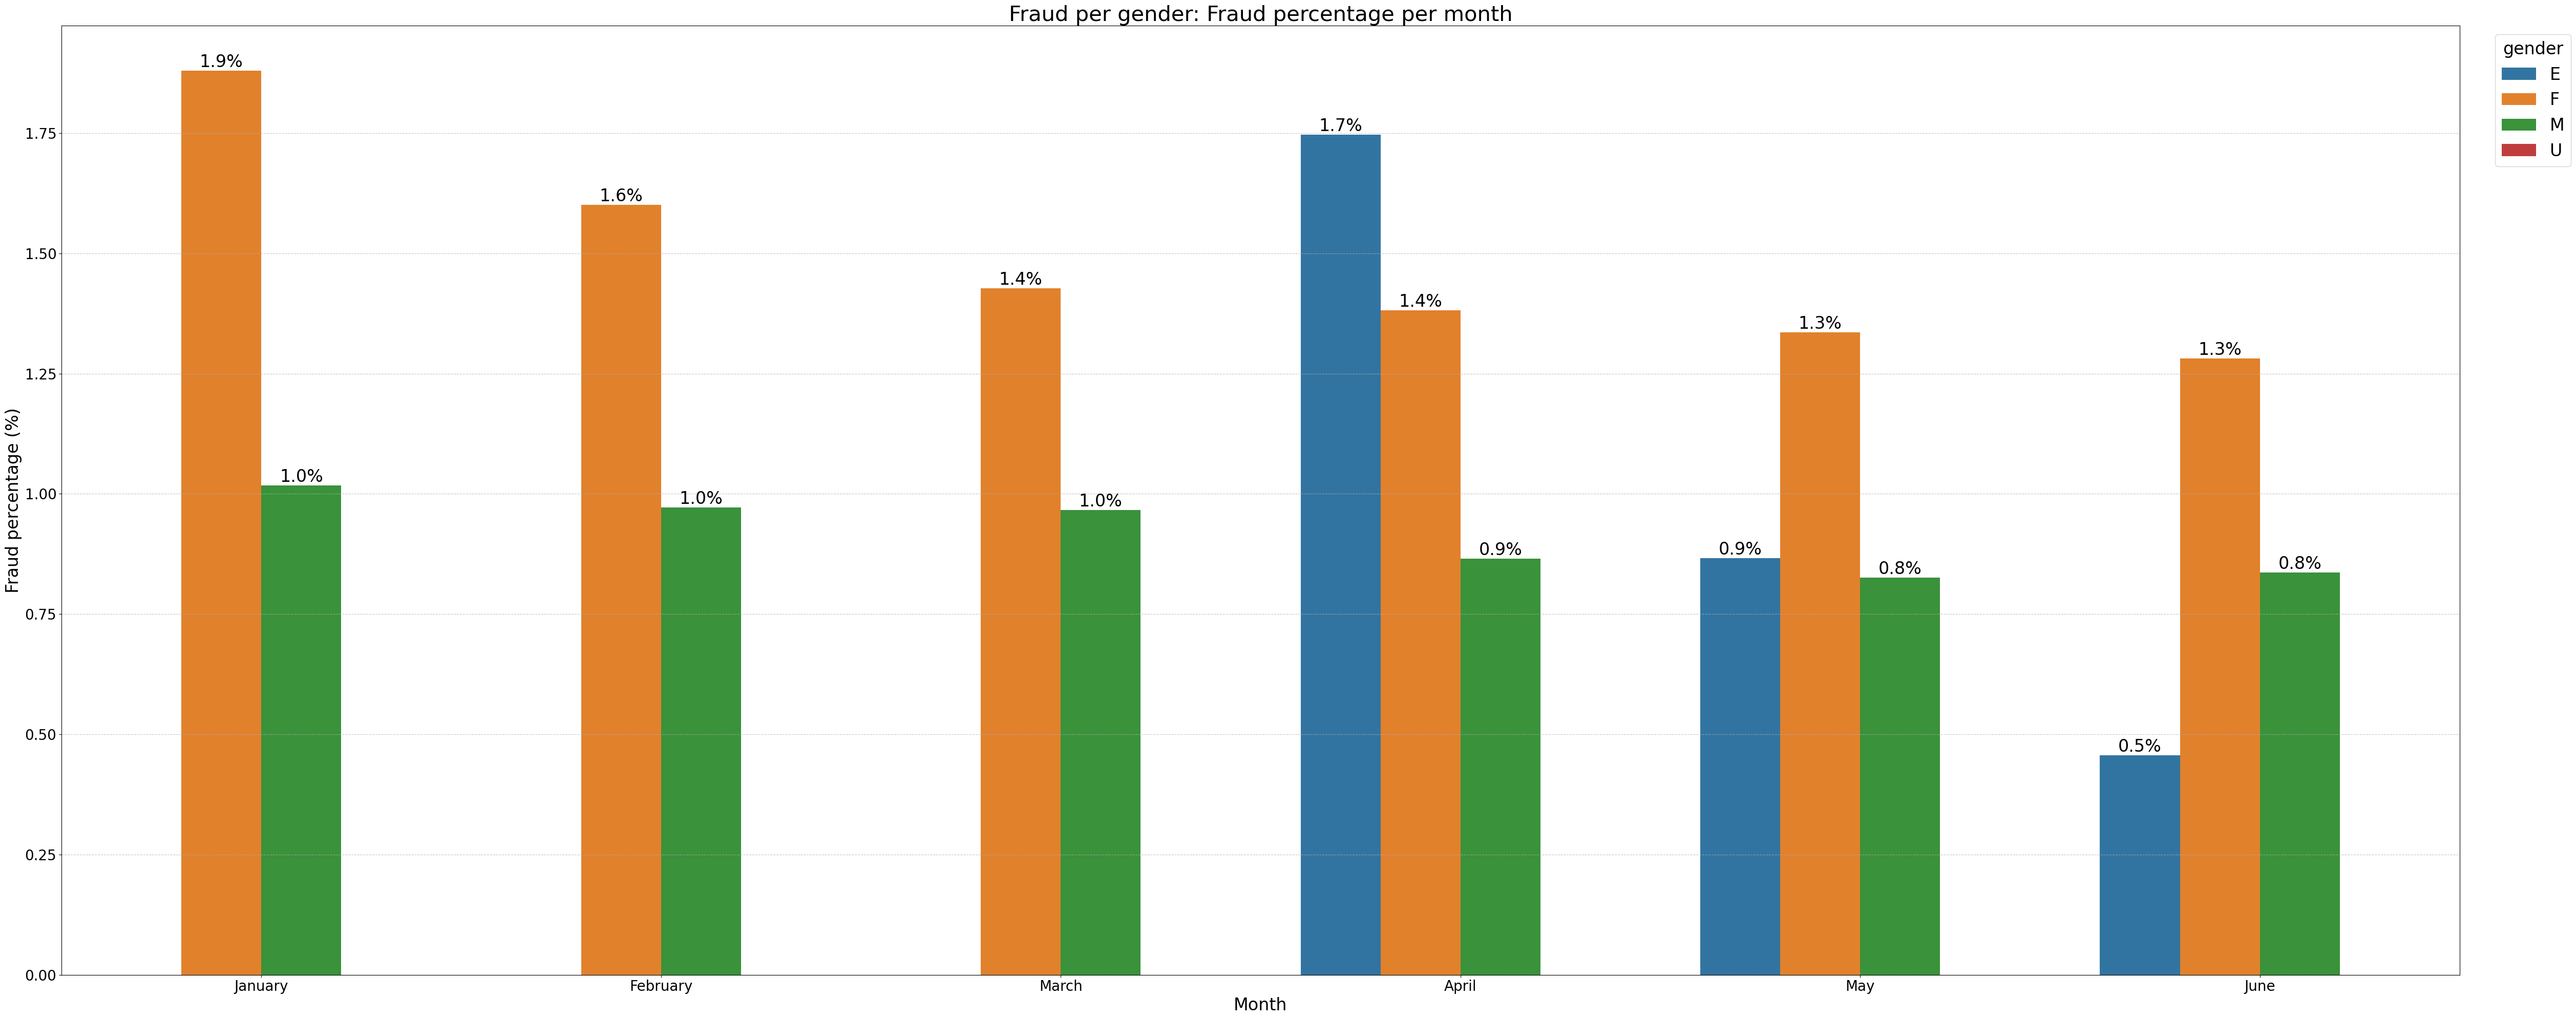

In [67]:
group_data = df.groupby(['month', "gender"])['fraud'].mean().reset_index()
group_data['fraud'] *= 100  # Convertir a porcentaje


plt.figure(figsize=(50, 20))
ax = sns.barplot(
        data=group_data, x='month', y='fraud', hue="gender", palette='tab10'
    )


for container in ax.containers:
        labels = [f"{v:.1f}%" if v > 0 else "" for v in container.datavalues]
        ax.bar_label(container, labels=labels, label_type='edge', fontsize=24)


plt.title("Fraud per gender: Fraud percentage per month", fontsize=30)
plt.xlabel('Month', fontsize=24)
plt.ylabel('Fraud percentage (%)', fontsize=24)
    
ax.tick_params(axis='x', labelsize=20) 
ax.tick_params(axis='y', labelsize=20) 


if group_data["gender"].nunique() > 1:
        plt.legend(title="gender", bbox_to_anchor=(1.05, 1), loc='upper right',fontsize=24, title_fontsize=24)
else:
        plt.legend([], [], frameon=False) 

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



###### Fraude por merchant

C:\Users\esteb\AppData\Local\Temp\ipykernel_262020\2168692469.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = df.groupby(['month', "merchant"])['fraud'].mean().reset_index()


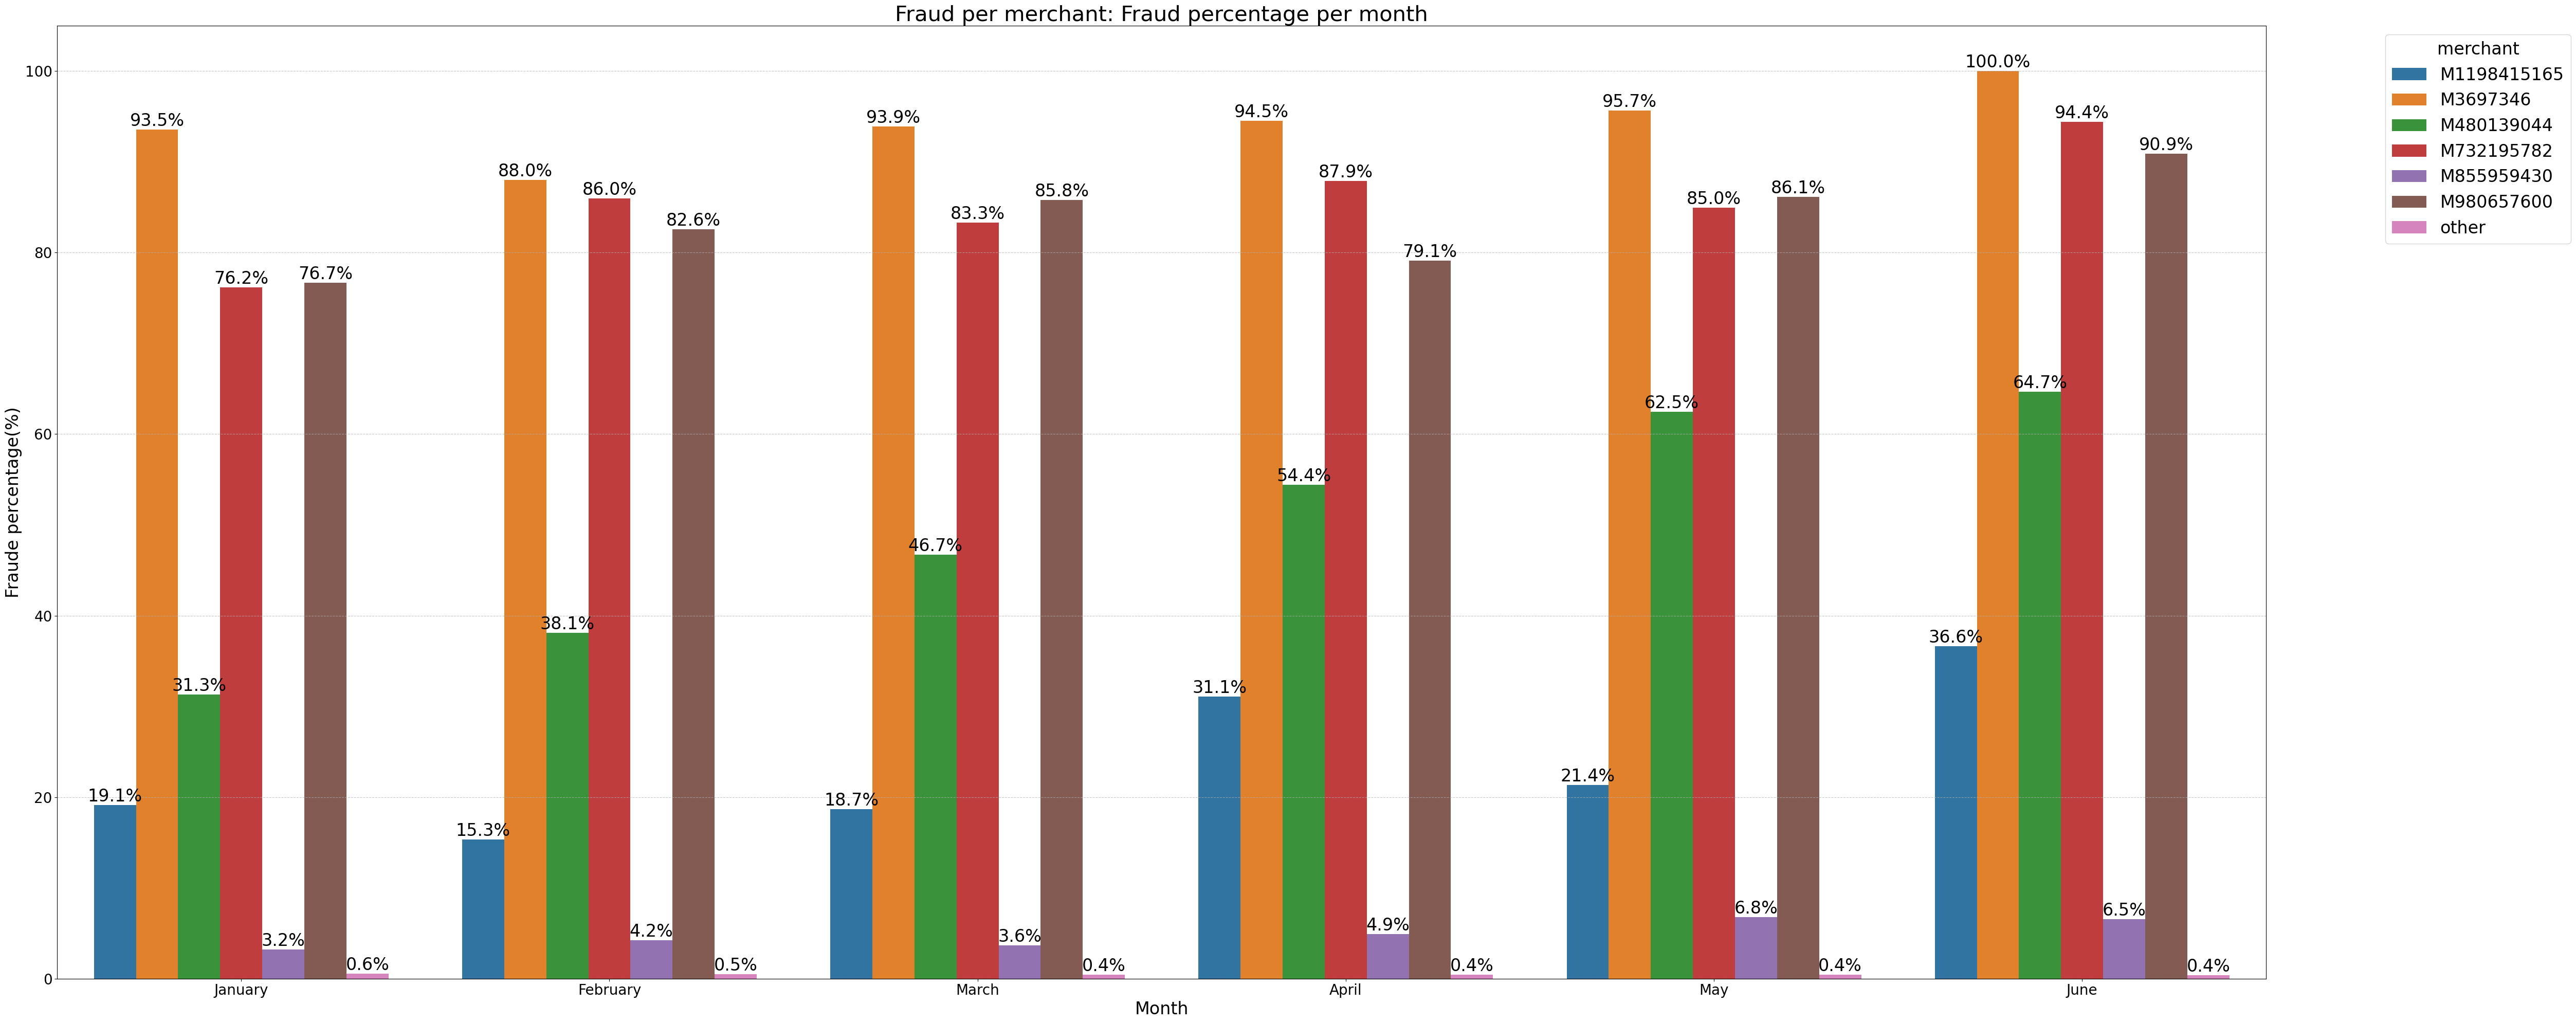

In [68]:
group_data = df.groupby(['month', "merchant"])['fraud'].mean().reset_index()
group_data['fraud'] *= 100  


plt.figure(figsize=(50, 20))
ax = sns.barplot(
        data=group_data, x='month', y='fraud', hue="merchant", palette='tab10'
    )


for container in ax.containers:
        labels = [f"{v:.1f}%" if v > 0 else "" for v in container.datavalues]
        ax.bar_label(container, labels=labels, label_type='edge', fontsize=24)


plt.title("Fraud per merchant: Fraud percentage per month", fontsize=30)
plt.xlabel('Month', fontsize=24)
plt.ylabel('Fraude percentage(%)', fontsize=24)
    
ax.tick_params(axis='x', labelsize=20)  
ax.tick_params(axis='y', labelsize=20)  

if group_data["merchant"].nunique() > 1:  
        plt.legend(title="merchant", bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=24, title_fontsize=24)
else:
        plt.legend([], [], frameon=False) 

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


###### Fraude por edad

C:\Users\esteb\AppData\Local\Temp\ipykernel_262020\2591416772.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = df.groupby(['month', "age"])['fraud'].mean().reset_index()


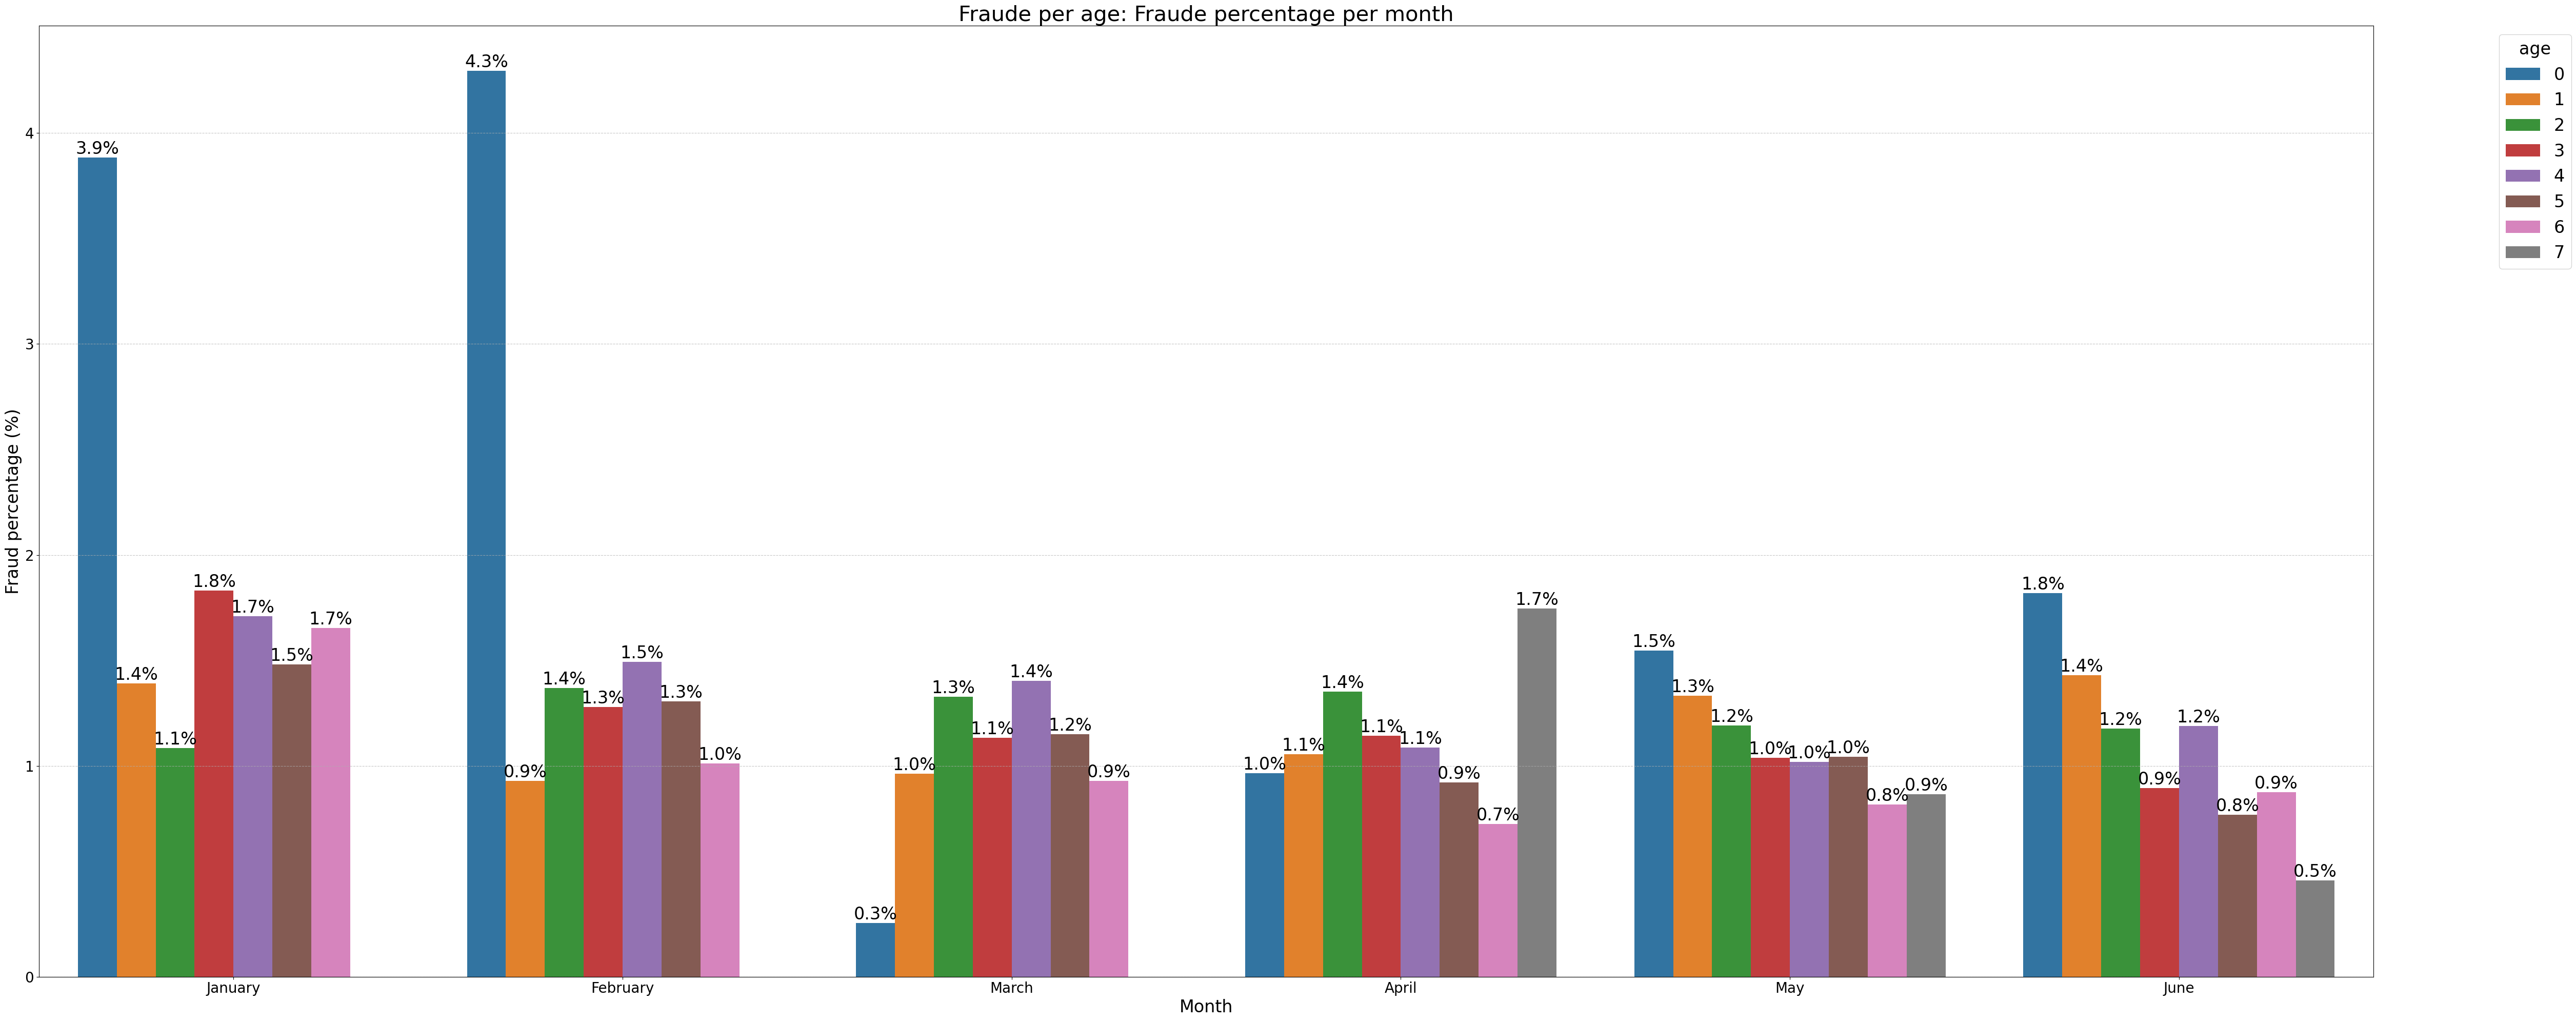

In [69]:
group_data = df.groupby(['month', "age"])['fraud'].mean().reset_index()
group_data['fraud'] *= 100 

plt.figure(figsize=(50, 20))
ax = sns.barplot(
        data=group_data, x='month', y='fraud', hue="age", palette='tab10'
    )


for container in ax.containers:
        labels = [f"{v:.1f}%" if v > 0 else "" for v in container.datavalues]
        ax.bar_label(container, labels=labels, label_type='edge', fontsize=24)


plt.title("Fraude per age: Fraude percentage per month", fontsize=30)
plt.xlabel('Month', fontsize=24)
plt.ylabel('Fraud percentage (%)', fontsize=24)
    
ax.tick_params(axis='x', labelsize=20) 
ax.tick_params(axis='y', labelsize=20) 

if group_data["age"].nunique() > 1:  
        plt.legend(title="age", bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=24, title_fontsize=24)
else:
        plt.legend([], [], frameon=False)  
        
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


###### Fraude por categoría

C:\Users\esteb\AppData\Local\Temp\ipykernel_262020\780111644.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = df.groupby(['month', "category"])['fraud'].mean().reset_index()


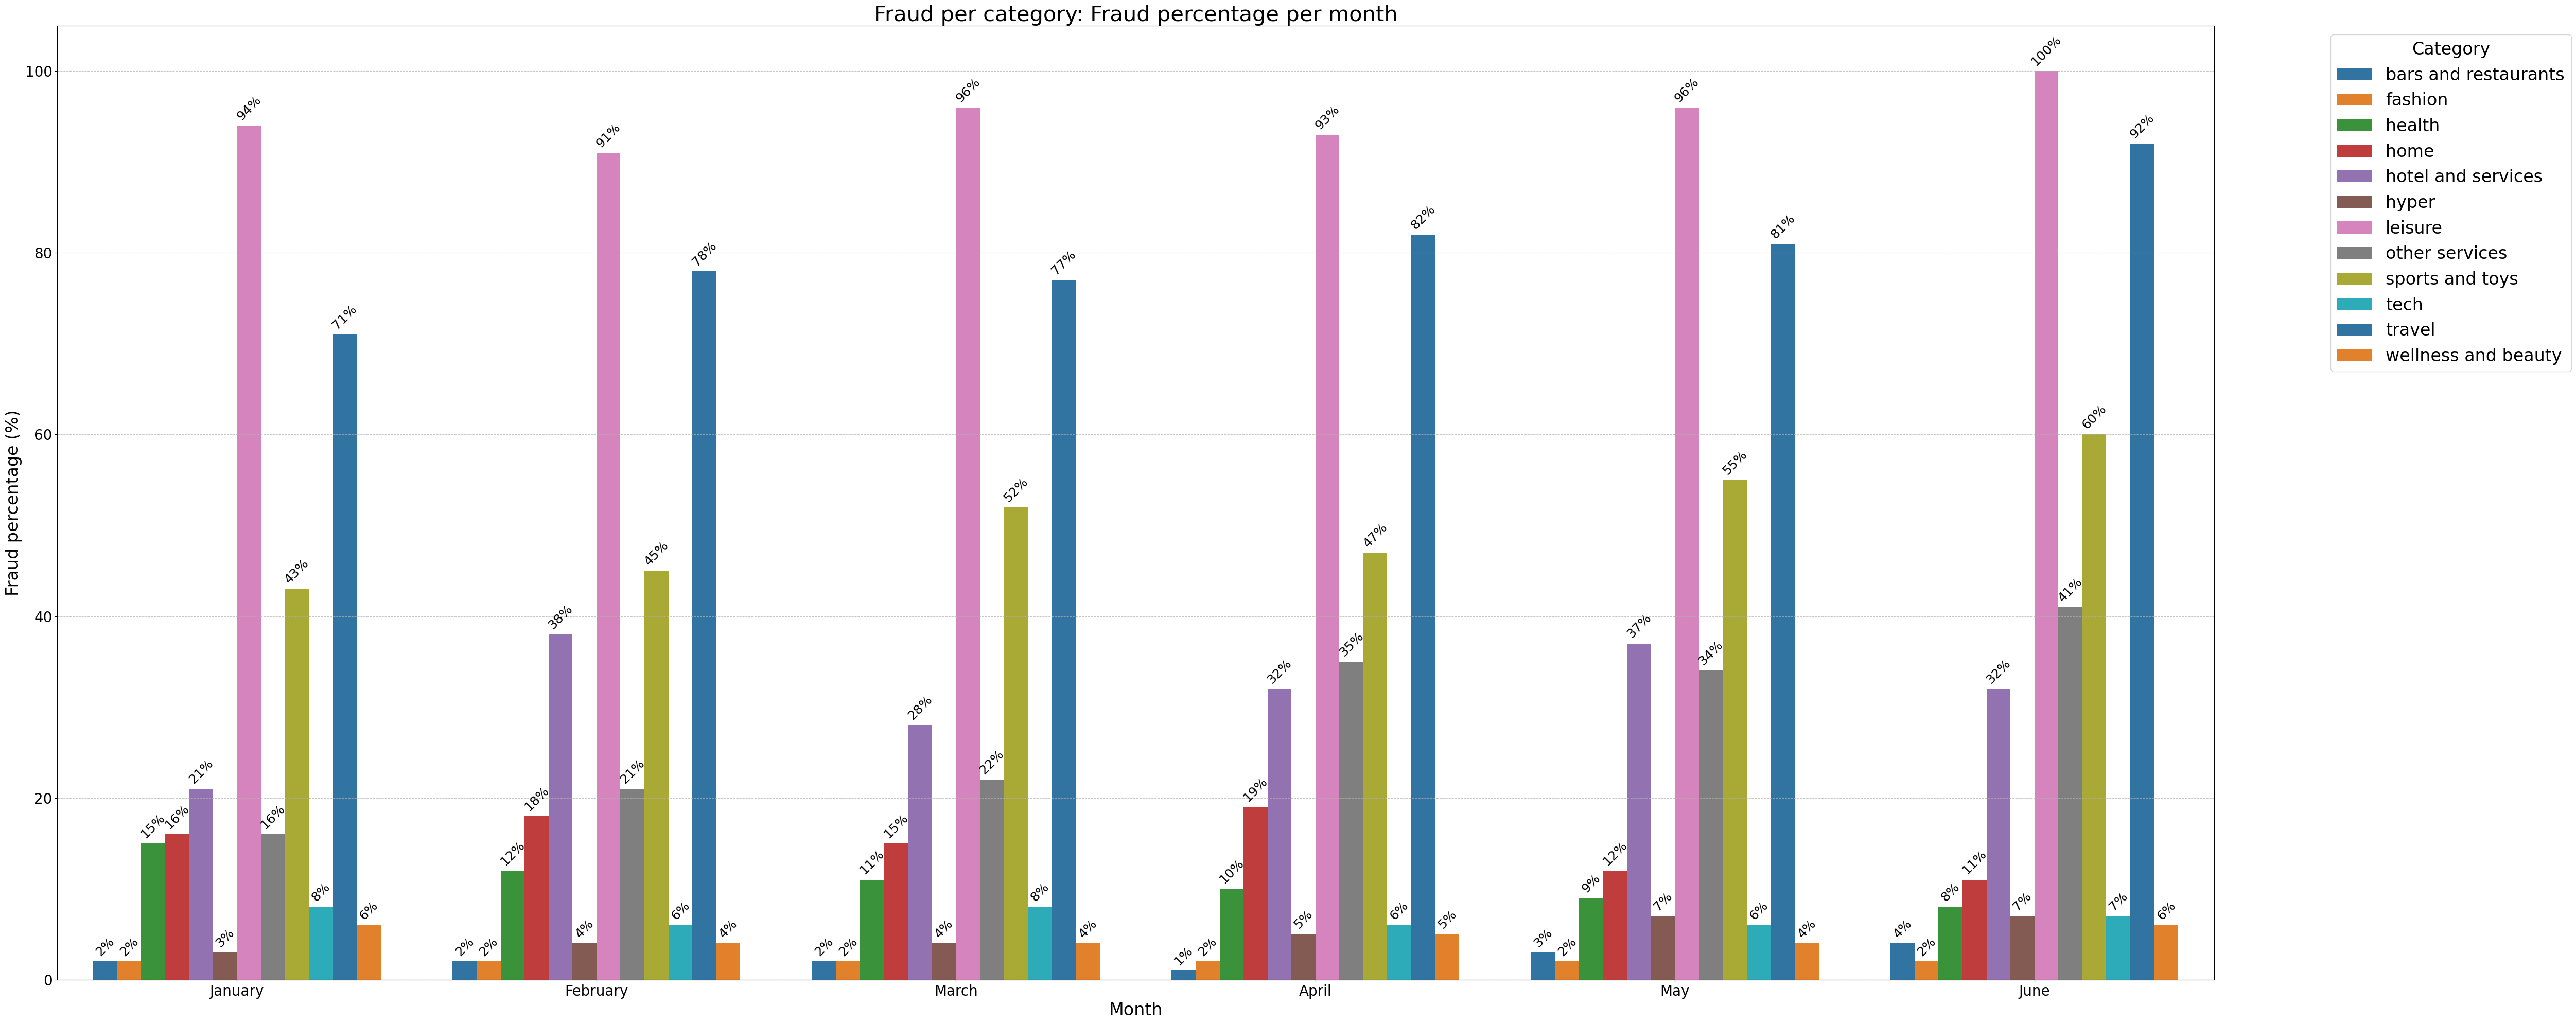

In [70]:
group_data = df.groupby(['month', "category"])['fraud'].mean().reset_index()
group_data['fraud'] = (group_data['fraud'] * 100).round(0).astype(int)  


group_data = group_data[group_data['fraud'] > 0]


plt.figure(figsize=(50, 20))
ax = sns.barplot(
    data=group_data, 
    x='month', 
    y='fraud', 
    hue="category", 
    palette='tab10',
    width=0.8  
)


for container in ax.containers:
    labels = [f"{int(v)}%" if v > 0 else "" for v in container.datavalues]  
    
    ax.bar_label(
        container, 
        labels=labels, 
        label_type='edge', 
        fontsize=18, 
        padding=4,
        rotation=45  
    )


plt.title("Fraud per category: Fraud percentage per month", fontsize=30)
plt.xlabel('Month', fontsize=24)
plt.ylabel('Fraud percentage (%)', fontsize=24)

plt.xticks(ha='center', fontsize=20)

ax.tick_params(axis='y', labelsize=20)

if group_data["category"].nunique() > 1:  
    plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=24, title_fontsize=24)
else:
    plt.legend([], [], frameon=False)  

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Machine Learning
 Pasamos las columnas age, gender, merchant y category de valor categorico a numérico usando get_dummies() para poder entrenar el modelo

In [84]:
df_dummies=pd.get_dummies(df,columns=['age','gender','merchant','category', 'month'])

In [85]:
df_dummies

,amount,fraud,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,...,category_tech,category_transportation,category_travel,category_wellness and beauty,month_January,month_February,month_March,month_April,month_May,month_June
0,4.55,0,False,False,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,False
1,39.68,0,False,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
2,26.89,0,False,False,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,False
3,17.25,0,False,False,False,True,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
4,35.72,0,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594638,20.53,0,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
594639,50.73,0,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
594640,22.44,0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
594641,14.46,0,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True


##### Observamos las correlaciones, las visualizamos y vemos que con los datos que tenemos no es la mejor manera de hacer una correlación entre diferentes columnas

In [86]:
df_dummies.corr()

,amount,fraud,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,...,category_tech,category_transportation,category_travel,category_wellness and beauty,month_January,month_February,month_March,month_April,month_May,month_June
amount,1.000000,0.489967,0.005033,-0.001061,0.002851,-0.000054,0.001324,-0.004509,-0.001997,-0.000505,...,0.047163,-0.233093,0.695336,0.040002,0.006459,0.003891,-0.001424,-0.002057,-0.002180,-0.003829
fraud,0.489967,1.000000,0.004394,-0.000769,0.002517,-0.000943,0.003573,-0.003630,-0.004685,-0.002512,...,0.031556,-0.262973,0.250284,0.052348,0.010208,0.003862,0.000150,-0.002658,-0.004720,-0.005572
age_0,0.005033,0.004394,1.000000,-0.021181,-0.043635,-0.036896,-0.030489,-0.022080,-0.013972,-0.002867,...,0.002594,-0.009015,0.002250,0.004472,-0.002630,-0.002848,-0.002090,-0.001177,0.003606,0.004612
age_1,-0.001061,-0.000769,-0.021181,1.000000,-0.223213,-0.188740,-0.155966,-0.112951,-0.071474,-0.014665,...,0.000747,0.001198,-0.000999,-0.004529,0.003140,0.001176,0.000019,-0.001290,-0.001440,-0.001214
age_2,0.002851,0.002517,-0.043635,-0.223213,1.000000,-0.388826,-0.321308,-0.232692,-0.147244,-0.030212,...,0.000544,-0.000854,0.000899,0.002670,0.001465,0.001067,0.000871,0.000133,-0.000201,-0.003131
age_3,-0.000054,-0.000943,-0.036896,-0.188740,-0.388826,1.000000,-0.271685,-0.196755,-0.124504,-0.025546,...,0.000284,-0.002978,0.001212,0.000355,-0.003648,-0.001605,-0.001179,0.001481,0.001200,0.003289
age_4,0.001324,0.003573,-0.030489,-0.155966,-0.321308,-0.271685,1.000000,-0.162589,-0.102884,-0.021110,...,-0.000174,-0.001752,0.000438,0.001770,-0.001680,-0.000930,0.000947,-0.000309,0.000156,0.001616
age_5,-0.004509,-0.003630,-0.022080,-0.112951,-0.232692,-0.196755,-0.162589,1.000000,-0.074509,-0.015288,...,-0.001797,0.005894,-0.002928,-0.002516,0.004119,0.000417,-0.001007,-0.000515,-0.000542,-0.002082
age_6,-0.001997,-0.004685,-0.013972,-0.071474,-0.147244,-0.124504,-0.102884,-0.074509,1.000000,-0.009674,...,-0.000992,0.004305,0.000051,-0.000941,-0.001517,0.001611,0.000701,-0.000298,-0.000764,0.000268
age_7,-0.000505,-0.002512,-0.002867,-0.014665,-0.030212,-0.025546,-0.021110,-0.015288,-0.009674,1.000000,...,0.001384,-0.002713,-0.001560,-0.001175,-0.003831,-0.001613,0.000674,0.002176,0.000818,0.001319


<Axes: >

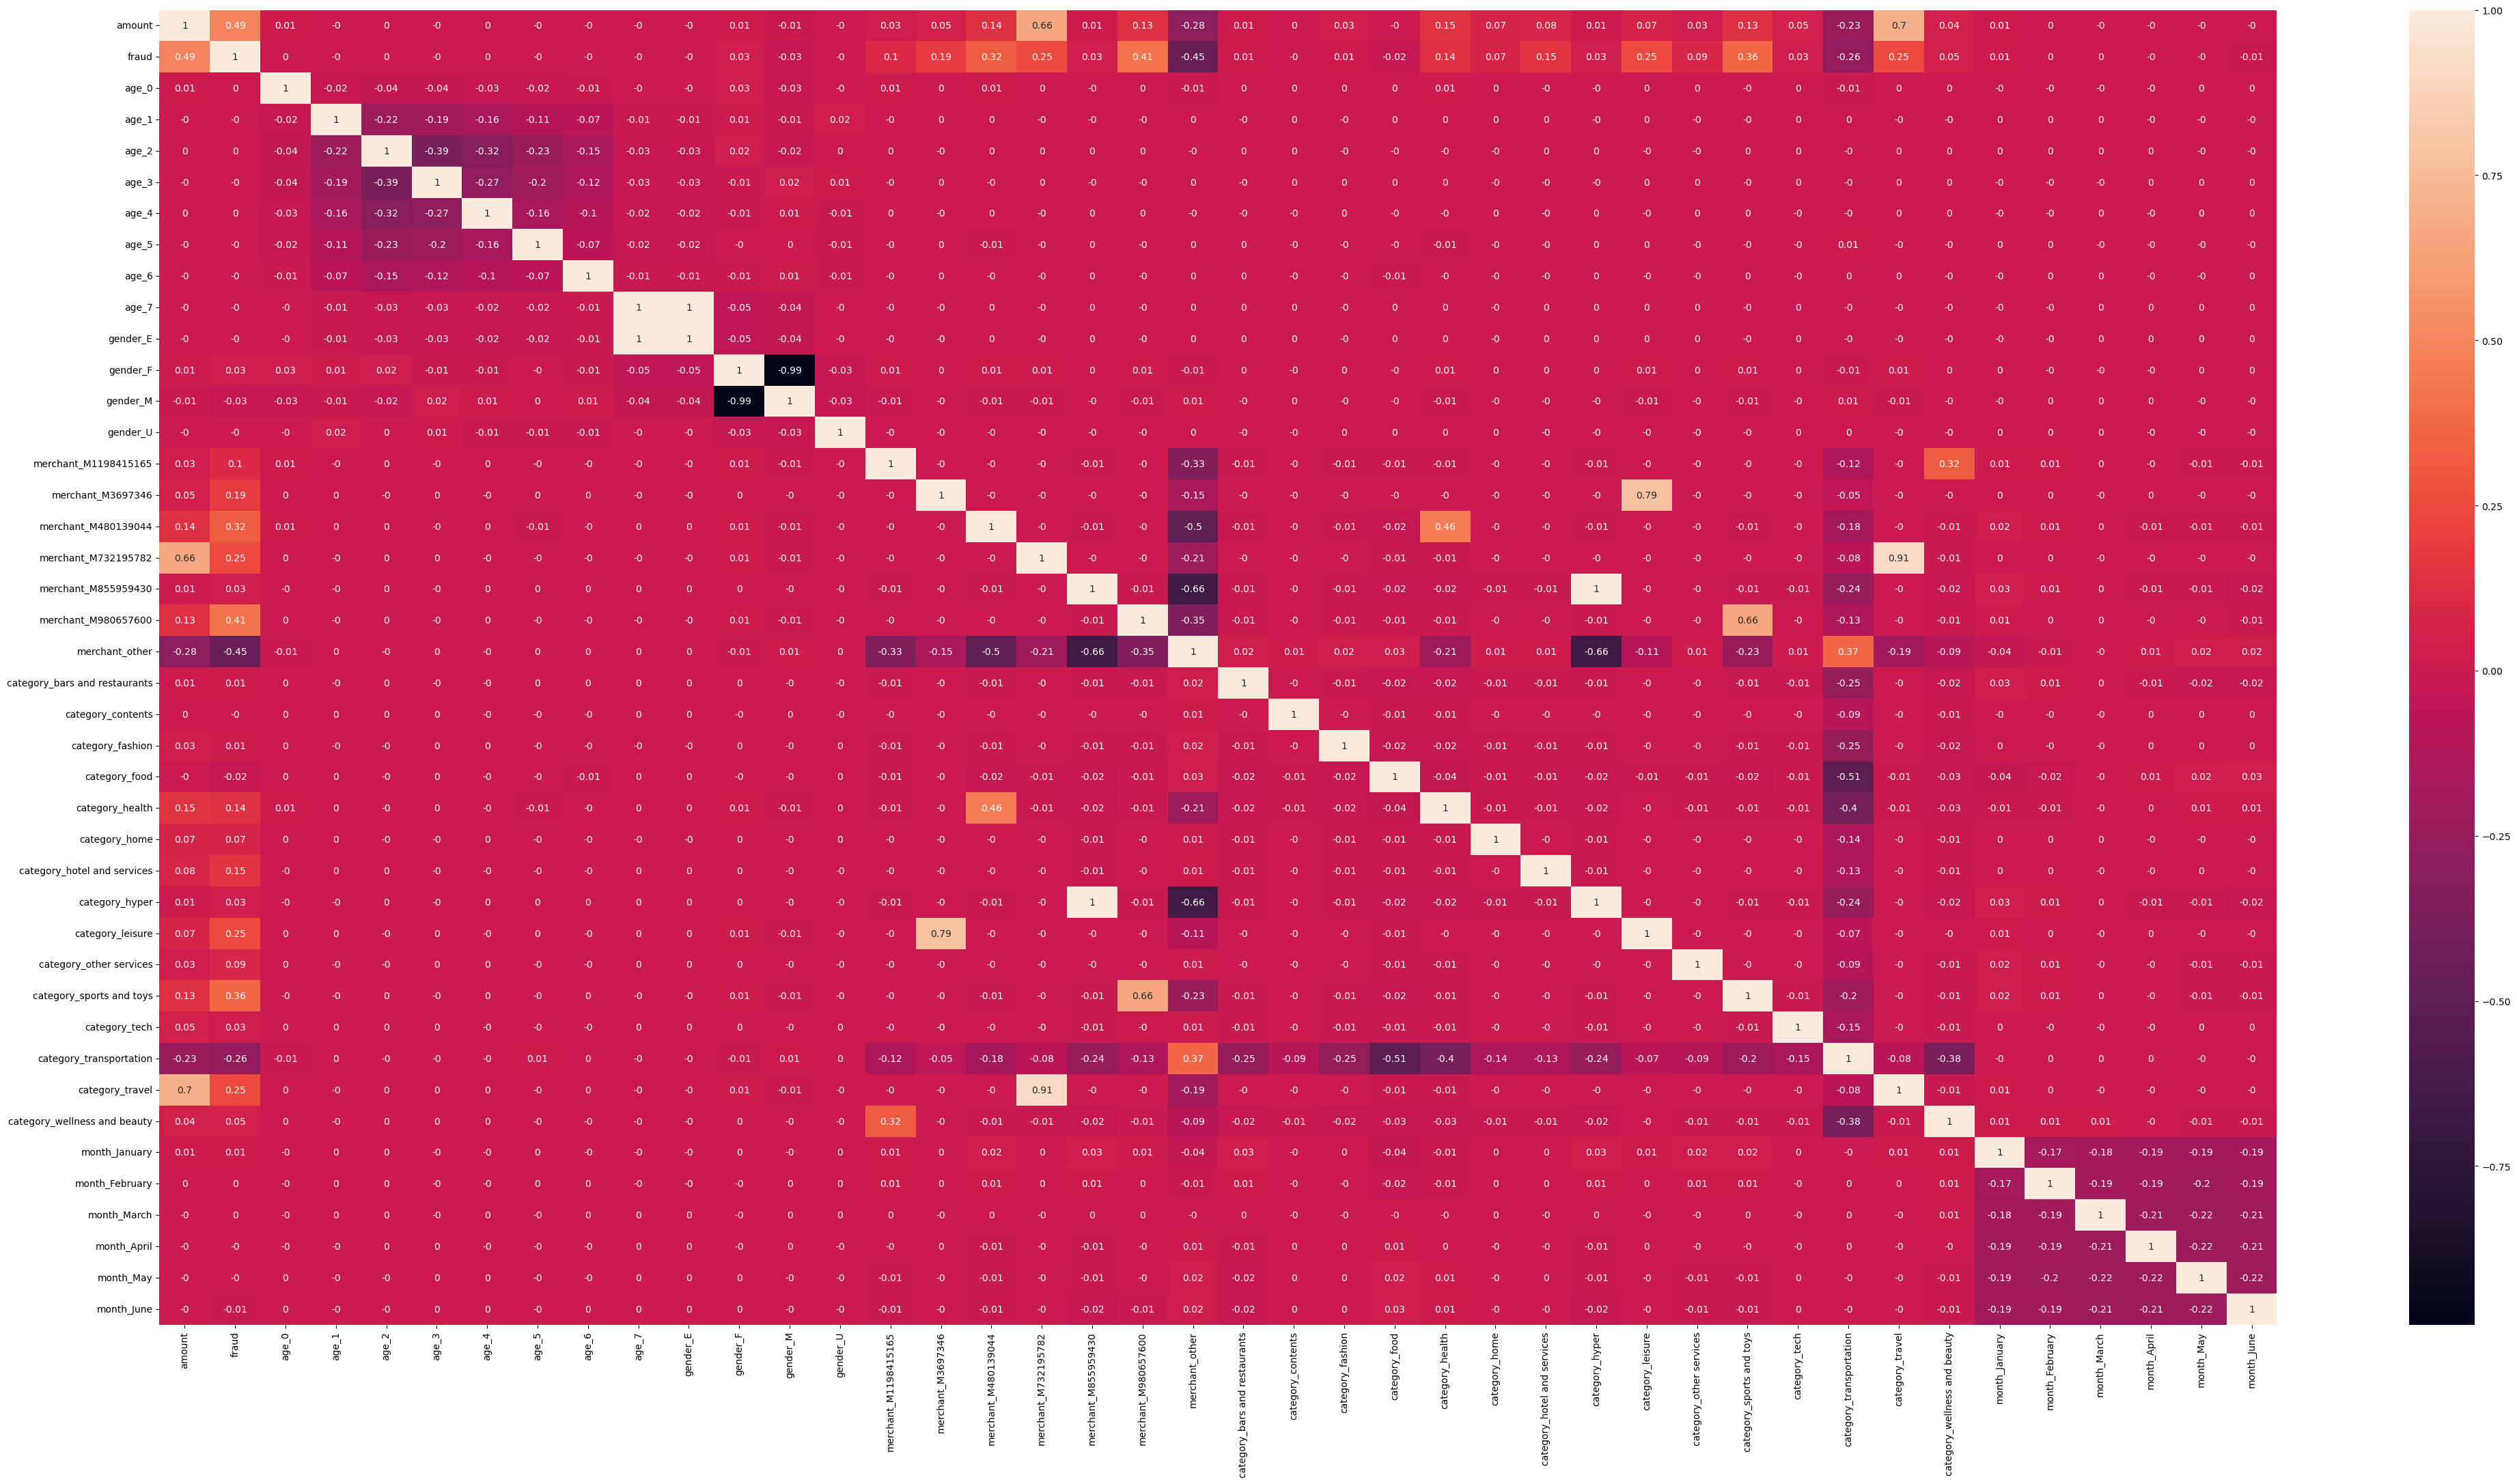

In [87]:
plt.figure(figsize=(50,25))
sns.heatmap(df_dummies.corr().round(2), annot=True)

##### El siguiente paso es identificar el target, en este caso la columna fraud para entrenar el modelo

In [122]:
X = df_dummies.drop(columns='fraud',axis=1) 
y = df_dummies.fraud

##### Ya que el gráfico de correlación no es de gran ayuda visual, usaremos Xgboost Classifier para poder visualizar mejor el dataset

In [90]:
model = xgb.XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [91]:
sort_idx = model.feature_importances_.argsort()

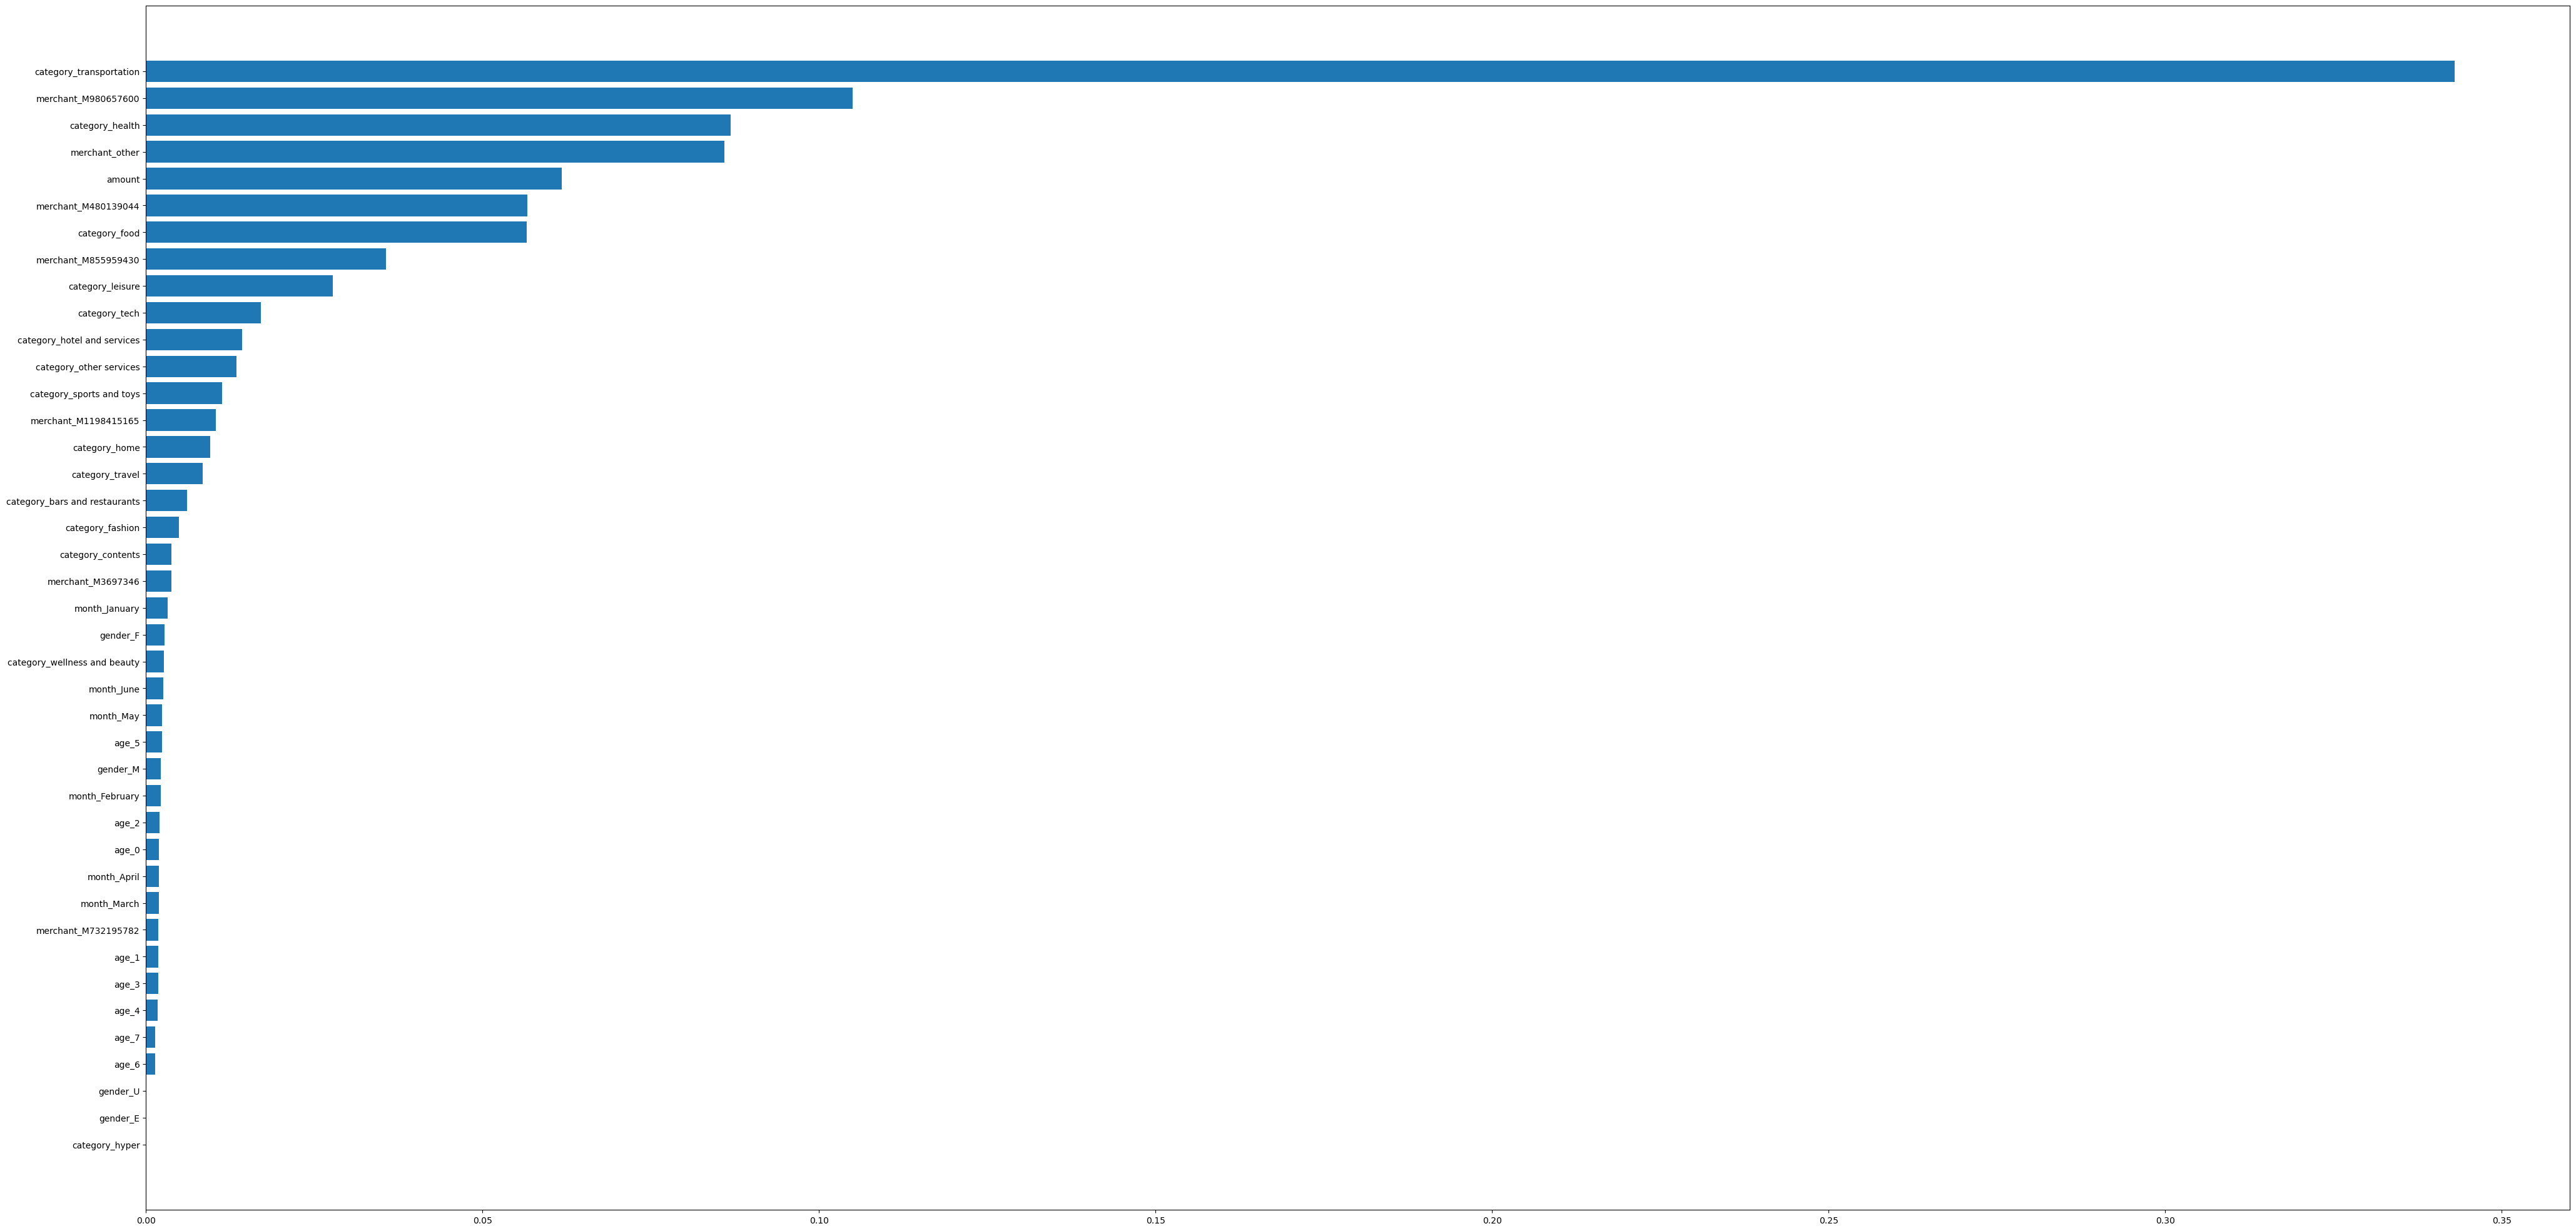

In [92]:
plt.figure(figsize=(50,25))
plt.barh(X.columns[sort_idx],model.feature_importances_[sort_idx])

plt.show();

#### Aprendizaje Supervisado

##### Elegimos los tres modelos a entrenar para el aprendizaje supervisado

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelos = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=20),
    "KNN": KNeighborsClassifier()
}

predicciones = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    predicciones[nombre] = modelo.predict(X_test)
    
predicciones["y_test"] = y_test

c:\Users\esteb\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Los evaluamos y visualizamos para ver cual es mejor

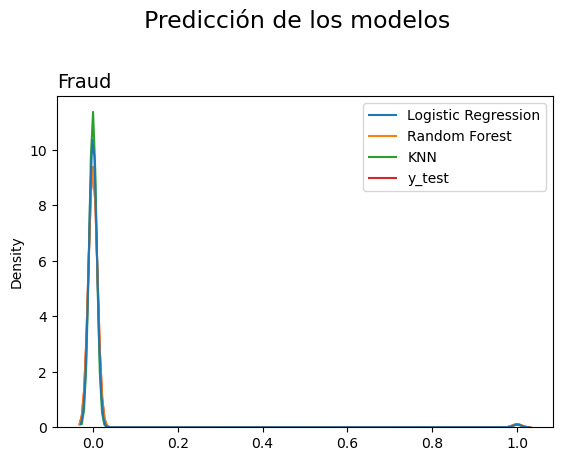

In [95]:
sns.kdeplot(predicciones)
plt.title("Fraud", loc="left", fontsize=14)
plt.suptitle("Predicción de los modelos", fontsize=17)


fig = plt.gcf()
fig.subplots_adjust(top=0.8)

In [96]:
metricas = []

for i in modelos:
    metricas.append({
        "modelo": i,
        "mse": mean_squared_error(y_test, predicciones[i]),
        "r2": r2_score(y_test, predicciones[i])        
    })
df_metricas = pd.DataFrame(metricas)
df_metricas

,modelo,mse,r2
0,Logistic Regression,0.004675,0.60289
1,Random Forest,0.006029,0.48790
2,KNN,0.005373,0.54361


C:\Users\esteb\AppData\Local\Temp\ipykernel_262020\3256914140.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metricas, x="modelo", y="mse", ax= ax[0], palette=colores)
C:\Users\esteb\AppData\Local\Temp\ipykernel_262020\3256914140.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metricas, x="modelo", y="r2", ax= ax[1], palette=colores)


Text(0.5, 0.98, 'Métricas de los modelos')

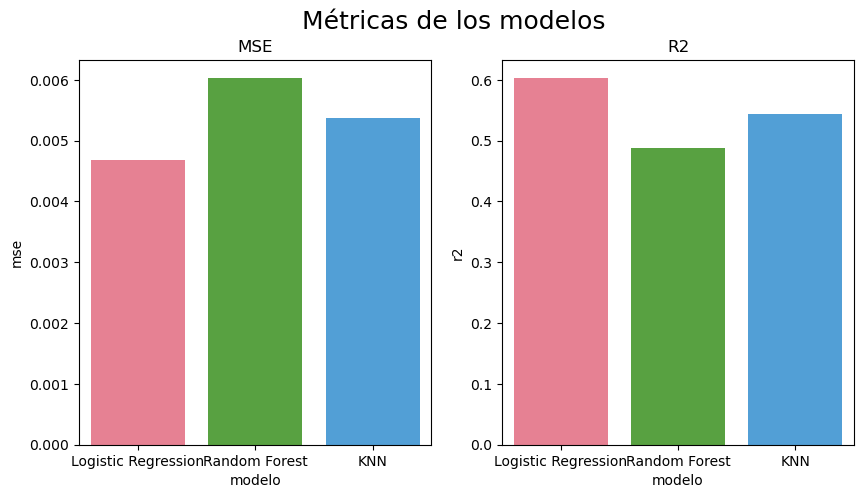

In [97]:
colores = sns.color_palette("husl", len(df_metricas)) 

fig, ax = plt.subplots(1, 2, figsize= (10, 5))
ax= ax.flatten()
sns.barplot(data=df_metricas, x="modelo", y="mse", ax= ax[0], palette=colores)
ax[0].set_title("MSE")

sns.barplot(data=df_metricas, x="modelo", y="r2", ax= ax[1], palette=colores)
ax[1].set_title("R2")

fig.suptitle("Métricas de los modelos", fontsize=18)

##### Una vez evaluados y después de haber elegido el mejor modelo, visualizamos la matriz de confusión de el mejor modelo

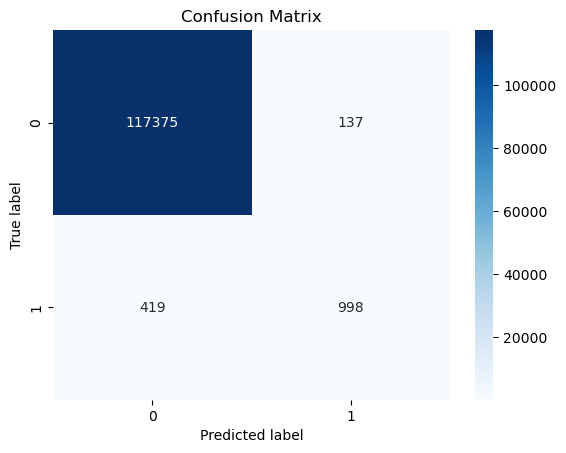

In [98]:


#Obtener la matriz de confusión
cm = confusion_matrix(y_test, predicciones["Logistic Regression"])

#Crear un mapa de calor para visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

#Agregar etiquetas y títulos
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")

#Mostrar la matriz de confusión
plt.show()

In [123]:
precision = precision_score(y_test, predicciones["Logistic Regression"])
recall = recall_score(y_test, predicciones["Logistic Regression"])
accuracy = accuracy_score(y_test, predicciones["Logistic Regression"])

print(f"Precisión: {precision:.2f}")
print(f"Exhaustividad: {recall:.2f}")
print(f"Exactitud: {accuracy:.2f}")

Precisión: 0.88
Exhaustividad: 0.70
Exactitud: 1.00


#### Aprendizaje no supervisado

##### Para este tipo de aprendizaje cambiamos los datos a númericos

In [107]:
df_encoded = df.copy()

genders={'M':1, 'F':2, 'E':3, 'U':0}
months={'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6}
df_encoded.gender = df_encoded.gender.map(genders)
df_encoded.month = df_encoded.month.map(months)

df_encoded['category'] = df_encoded['category'].map({cat: i for i, cat in enumerate(df_encoded.category.unique(), 1)})

encoder = OrdinalEncoder()
df_encoded[["gender", "merchant", "category"]] = encoder.fit_transform(df[["gender", "merchant", "category"]])

In [102]:
df_encoded.category.value_counts()

category
12.0    505119
3.0      26254
4.0      16133
14.0     15086
2.0       6454
0.0       6373
7.0       6098
10.0      4002
11.0      2370
5.0       1986
6.0       1744
9.0        912
1.0        885
13.0       728
8.0        499
Name: count, dtype: int64

In [103]:
df.category.value_counts()

category
transportation          505119
food                     26254
health                   16133
wellness and beauty      15086
fashion                   6454
bars and restaurants      6373
hyper                     6098
sports and toys           4002
tech                      2370
home                      1986
hotel and services        1744
other services             912
contents                   885
travel                     728
leisure                    499
Name: count, dtype: int64

##### Para poder entrenar este modelo, en específico la columna fraud, queremos encontrar las anomalías, que en este caso las anomalías serían los fraudes, por lo que lo normal es que no haya fraude, y usamos IsolationForest, en el que marcaremos las anomalías como -1 y las normales con 1

In [108]:
normal_data = df_encoded[df_encoded['fraud'] == 0]

features = ["age", "gender", "merchant", "category", "amount", "month"]

scaler = StandardScaler()
X_normal = scaler.fit_transform(normal_data[features])

model = IsolationForest(contamination=0.05, random_state=42)

model.fit(X_normal)

df_encoded['anomaly'] = model.predict(scaler.transform(df_encoded[features]))

df_encoded['fraud_predicted'] = df_encoded['anomaly'].apply(lambda x: 1 if x == -1 else 0)


print(df_encoded[['fraud', 'fraud_predicted']].sample(20))

        fraud  fraud_predicted
195111      0                0
111718      0                0
588582      0                0
211723      0                0
86517       0                0
227887      0                0
178304      0                0
215542      0                0
65689       0                0
10502       0                1
456941      0                0
182546      0                0
150374      0                0
319269      0                0
55076       0                0
186548      0                0
520336      0                0
563323      0                0
393213      0                0
365518      0                0


In [109]:
df_encoded.sample(20)

,age,gender,merchant,category,amount,fraud,month,anomaly,fraud_predicted
286562,2,2.0,6.0,12.0,4.21,0,4,1,0
536397,3,1.0,6.0,12.0,44.40,0,6,1,0
312950,3,1.0,6.0,12.0,2.41,0,4,1,0
495645,2,2.0,6.0,12.0,23.83,0,6,1,0
225610,4,1.0,6.0,12.0,41.65,0,3,1,0
535134,4,2.0,6.0,12.0,25.01,0,6,1,0
495234,4,1.0,6.0,12.0,27.60,0,6,1,0
96821,2,1.0,4.0,7.0,33.18,0,2,-1,1
226340,3,2.0,6.0,12.0,59.44,0,3,1,0
457657,2,2.0,6.0,12.0,34.79,0,5,1,0


##### Una vez tenemos los resultados, los evaluamos y los visualizamos

In [116]:

y_true = df_encoded['fraud']
y_pred= df_encoded['fraud_predicted']


print("Evaluación de Isolation Forest:")
print(f"Precisión: {precision_score(y_true, y_pred)}")
print(f"Exhaustividad: {recall_score(y_true, y_pred)}")
print(f"F1-Score: {f1_score(y_true, y_pred)}")
print(f"AUC: {roc_auc_score(y_true, y_pred)}")
print("\nMatriz de Confusión de Isolation Forest:")
print(confusion_matrix(y_true, y_pred))
print("\nReporte de Clasificación de Isolation Forest:")
print(classification_report(y_true, y_pred))

Evaluación de Isolation Forest:
Precisión: 0.18237995824634656
Exhaustividad: 0.91
F1-Score: 0.3038608695652174
AUC: 0.9299992765255524

Matriz de Confusión de Isolation Forest:
[[558070  29373]
 [   648   6552]]

Reporte de Clasificación de Isolation Forest:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    587443
           1       0.18      0.91      0.30      7200

    accuracy                           0.95    594643
   macro avg       0.59      0.93      0.64    594643
weighted avg       0.99      0.95      0.97    594643



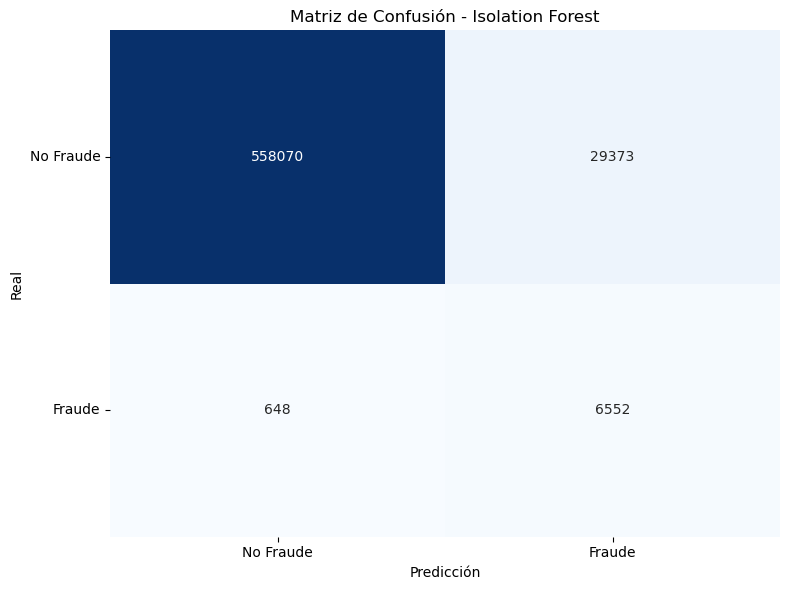

In [ ]:
cm_isolation = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_isolation, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión - Isolation Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.xticks(ticks=[0.5, 1.5], labels=["No Fraude", "Fraude"])
plt.yticks(ticks=[0.5, 1.5], labels=["No Fraude", "Fraude"], rotation=0)

plt.tight_layout()
plt.show()

#### Una vez lo hemos visualizado y evaluado, hacemos una comparación de este modelo con el modelo supervisado para ver cual es mejor

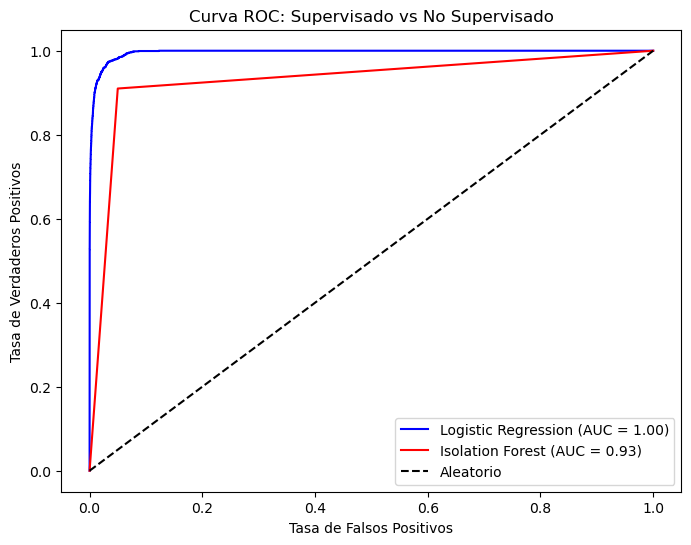

In [121]:
y_prob_supervisado = modelos["Logistic Regression"].predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_supervisado)
auc_rf = auc(fpr_rf, tpr_rf)


fpr_if, tpr_if, _ = roc_curve(df_encoded['fraud'], df_encoded['fraud_predicted'])
auc_if = auc(fpr_if, tpr_if)



plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Logistic Regression (AUC = {auc_rf:.2f})", color="blue")
plt.plot(fpr_if, tpr_if, label=f"Isolation Forest (AUC = {auc_if:.2f})", color="red")
plt.plot([0, 1], [0, 1], "k--", label="Aleatorio")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC: Supervisado vs No Supervisado")
plt.legend()
plt.show()
